**ML4.1 Предобработка данных**<br>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1.	Загрузите и прочитайте в pandas следующий датасет. Обратите внимание, что датасет собран «криво», поэтому прежде чем он «правильно» загрузится (рис.1), необходимо его обработать.

Читаем датасет

In [2]:
dates_list = ["dateCreated", "lastSeen", "dateCrawled"]

In [4]:
df = pd.read_csv("./cars_sampled.csv", parse_dates=dates_list)
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,2016-01-04 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-07-04 04:44:00
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,2016-03-16,55270,2016-01-04 23:18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,2016-03-04 15:48:00,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,2016-03-04,29690,2016-05-04 15:16:00
49997,2016-03-27 14:55:00,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,2016-03-27,50181,2016-07-04 11:45:00
49998,2016-03-14 18:51:00,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,2016-03-14,86956,2016-03-25 06:17:00
49999,2016-03-15 18:06:00,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,2016-03-15,65232,2016-06-04 17:15:00


2.	Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.

Размерность

In [5]:
df.shape

(50001, 19)

In [6]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

Типы данных

In [7]:
df.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
postalCode                      int64
lastSeen               datetime64[ns]
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          50001 non-null  datetime64[ns]
 1   name                 50001 non-null  object        
 2   seller               50001 non-null  object        
 3   offerType            50001 non-null  object        
 4   price                50001 non-null  int64         
 5   abtest               50001 non-null  object        
 6   vehicleType          44813 non-null  object        
 7   yearOfRegistration   50001 non-null  int64         
 8   gearbox              47177 non-null  object        
 9   powerPS              50001 non-null  int64         
 10  model                47243 non-null  object        
 11  kilometer            50001 non-null  int64         
 12  monthOfRegistration  50001 non-null  int64         
 13  fuelType             45498 non-

Описательная статистика

In [9]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


Пустые значения

In [10]:
df.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

Шкалы измерения каждого существенного признака

In [12]:
from typing import Tuple, Union

def scale_values_getter(value: pd.Series) -> Tuple[np.dtype, int, Union[int, str], Union[int, str], list]:

    uniq_values = sorted(value.dropna().unique())
    shape_value = len(uniq_values)
    min_value = pd.Series(uniq_values).dropna().min()
    max_value = pd.Series(uniq_values).dropna().max()
    
    if value.dtype == object:
        min_value, max_value = "-"*2

    return value.dtype, shape_value, min_value, max_value, uniq_values

res = df.apply(scale_values_getter).transpose()
res.columns = ["type","shape","min_value", "max_value", "uniq_values"]
res

,type,shape,min_value,max_value,uniq_values
dateCrawled,datetime64[ns],12039,2016-01-04 00:25:00,2016-12-03 23:59:00,"[2016-01-04T00:25:00.000000000, 2016-01-04T00:..."
name,object,38766,-,-,[!!!!!!!!__Skoda_Superb_2.0_TDI_DSG__Elegance_...
seller,object,2,-,-,"[commercial, private]"
offerType,object,2,-,-,"[offer, request]"
price,int64,2393,0,12345678,"[0, 1, 2, 3, 5, 7, 8, 10, 11, 12, 14, 15, 20, ..."
abtest,object,2,-,-,"[control, test]"
vehicleType,object,8,-,-,"[bus, cabrio, coupe, limousine, others, small ..."
yearOfRegistration,int64,97,1000,9999,"[1000, 1255, 1500, 1910, 1928, 1929, 1933, 193..."
gearbox,object,2,-,-,"[automatic, manual]"
powerPS,int64,460,0,19312,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14..."


3.	Поработайте с типами переменных. Все числовые значения переведите в формат int.

Все числовые значения уже переведены в формат int

4.	Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.

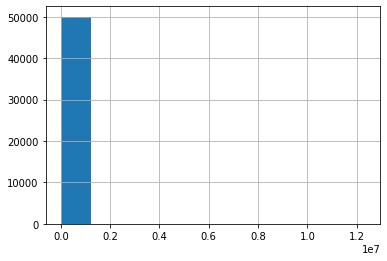

In [13]:
df["price"].hist()

Все значения оч сильно смещены влево т.к. много выбросов

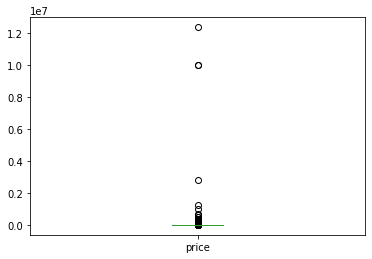

In [14]:
df["price"].plot.box()

In [15]:
df["price"].isna().sum()

0

Убираем выбросы

In [16]:
for x in ["price"]:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

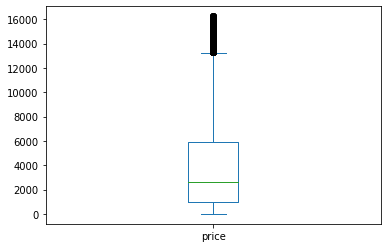

In [17]:
df["price"].plot.box()

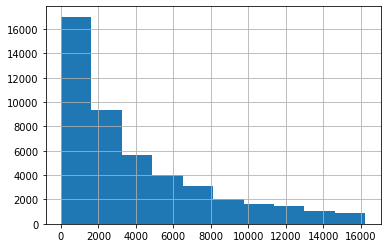

In [18]:
df["price"].hist()

Нормализация с помощью log

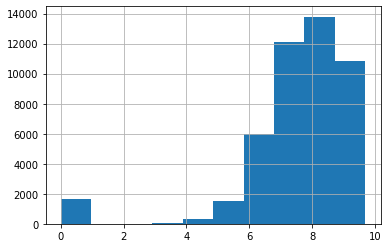

In [19]:
df['price'] = np.log(df['price']+1)
df['price'].hist()

In [20]:
df["price"].isna().sum()

3757

5.	Аналогично поработайте и с другими «важными для целевой функции price» параметрами (powerPS, yearOfRegistration, kilometer и т.д). «Важность» докажите через коэффициент корреляции. Сделайте визуализацию.

Корреляционная матрица

In [21]:
df.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
price,1.000000,0.005603,0.096838,-0.108628,0.170537,0.068389
yearOfRegistration,0.005603,1.000000,-0.004394,-0.064188,-0.023152,-0.001615
powerPS,0.096838,-0.004394,1.000000,-0.016447,0.034345,0.017415
kilometer,-0.108628,-0.064188,-0.016447,1.000000,0.001985,-0.024076
monthOfRegistration,0.170537,-0.023152,0.034345,0.001985,1.000000,0.019050
postalCode,0.068389,-0.001615,0.017415,-0.024076,0.019050,1.000000


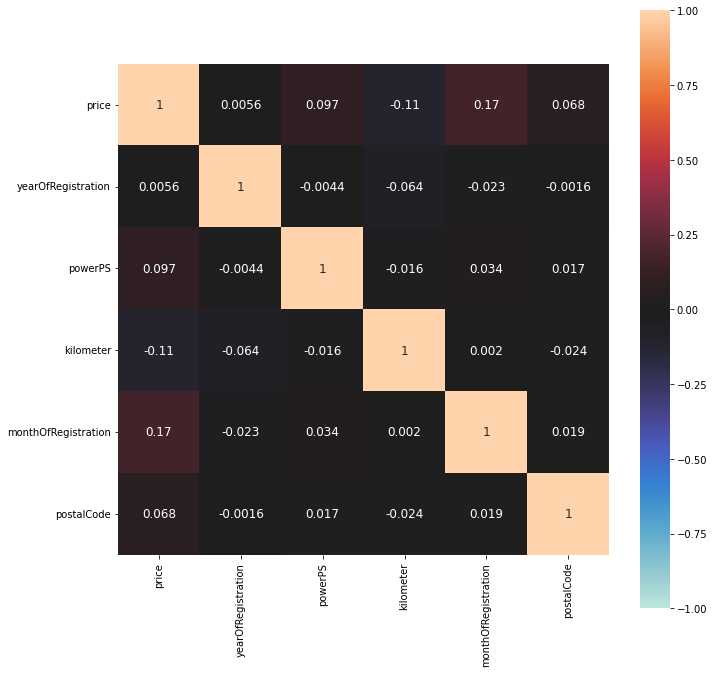

In [22]:
ax = sns.heatmap(
    df.corr(),
    annot=True,
    annot_kws={'size': 12},
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.figure.set_size_inches(11, 11)

Факторы слабо коррелируют с целевой функцией price

6.	Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?

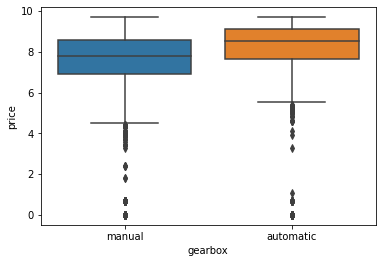

In [23]:
sns.boxplot(x=df["gearbox"], y=df["price"])

Авто с автоматической коробкой передач дороже

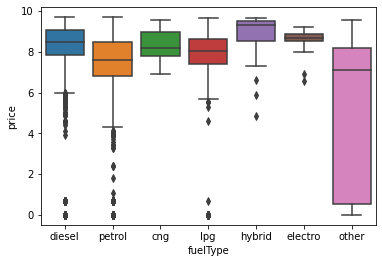

In [24]:
sns.boxplot(x=df["fuelType"], y=df["price"])

Гибриды дороже всех остальных, бензин - самый популярный

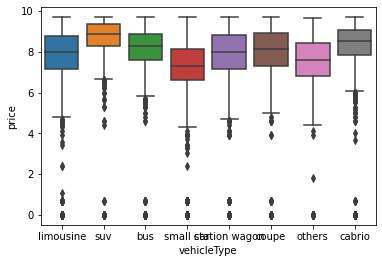

In [25]:
sns.boxplot(x=df["vehicleType"], y=df["price"])

Внедорожники дороже всех

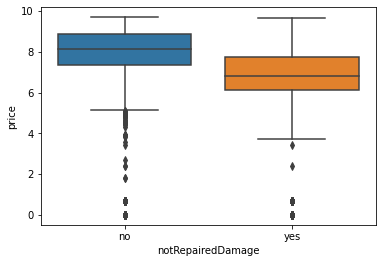

In [26]:
sns.boxplot(x=df["notRepairedDamage"], y=df["price"])

Авто, которые невозможно восстановить, стоят меньше

Судя по графикам, у каждого фактора есть выбросы, но они не очень значительные, следовательно, на этом можно остановиться

7.	Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения.

In [27]:
df.shape

(50001, 19)

In [28]:
nan_series = df.isna().sum()
nan_series[nan_series > 0]

price                3757
vehicleType          5188
gearbox              2824
model                2758
fuelType             4503
notRepairedDamage    9716
dtype: int64

Удаляем notRepairedDamage т.к. пропущенных значений слишком много относительно других

In [29]:
df = df.dropna(subset=["notRepairedDamage"])

In [30]:
assert df["notRepairedDamage"].isna().sum() == 0

Исследуем остальные пропущенные значения. Все пропущенные значение - категориальные, значит у нас есть два пути: удаление и установка по медиане

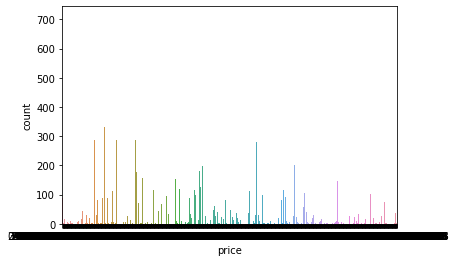

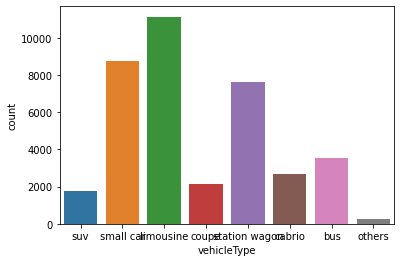

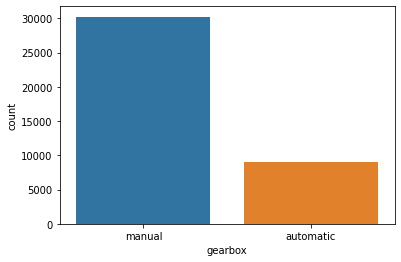

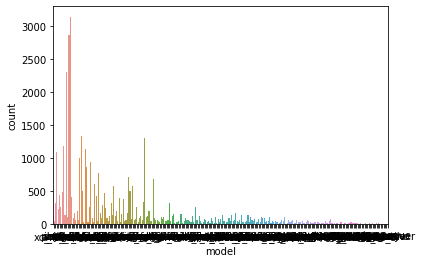

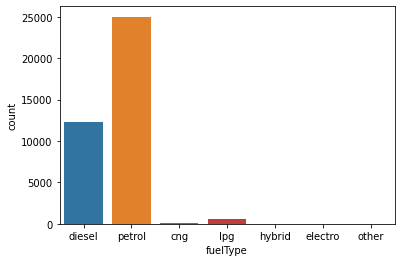

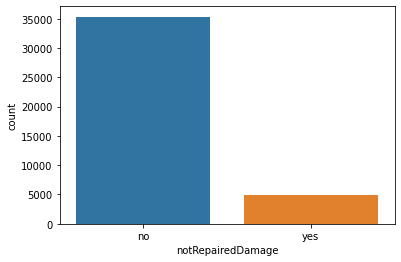

In [31]:
for column in nan_series[nan_series > 0].to_dict().keys():
    sns.countplot(df[column])
    plt.show()

Для всех презнаков, кроме model, поставим моду. Выкидываем модели, которые не указаны

In [33]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

In [34]:
# Выставляем моду
for column in ["fuelType", "gearbox", "vehicleType"]:
    df[column] = df[column].fillna(df[column].value_counts().index[0])

<ipython-input-34-0328faa84e80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].value_counts().index[0])


In [35]:
nan_series = df.isna().sum()
nan_series[nan_series >0]

price    3548
model    1519
dtype: int64

price и model удаляем из выборки

In [36]:
df = df.dropna()
df.shape

(35348, 19)

8.	Сохраните полученный датасет и выведете его.

In [37]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,9.495519,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,2016-03-26 13:17:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,8.412055,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-07-04 04:44:00
5,2016-02-04 12:51:00,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,6.896694,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no,2016-02-04,26826,2016-02-04 12:51:00
7,2016-03-24 15:52:00,Mercedes_Benz_CLK_Coupe_200,private,offer,7.244228,test,coupe,1997,manual,136,clk,150000,11,petrol,mercedes_benz,no,2016-03-24,13353,2016-03-27 12:45:00
8,2016-03-28 14:40:00,Vectra_C_Caravan_1_8_Edition_Facelift_m_AHK_In...,private,offer,8.451267,test,station wagon,2005,manual,122,vectra,150000,12,petrol,opel,no,2016-03-28,28307,2016-06-04 18:19:00


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35348 entries, 1 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          35348 non-null  datetime64[ns]
 1   name                 35348 non-null  object        
 2   seller               35348 non-null  object        
 3   offerType            35348 non-null  object        
 4   price                35348 non-null  float64       
 5   abtest               35348 non-null  object        
 6   vehicleType          35348 non-null  object        
 7   yearOfRegistration   35348 non-null  int64         
 8   gearbox              35348 non-null  object        
 9   powerPS              35348 non-null  int64         
 10  model                35348 non-null  object        
 11  kilometer            35348 non-null  int64         
 12  monthOfRegistration  35348 non-null  int64         
 13  fuelType             35348 non-

In [39]:
df.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64

In [40]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,35348.000000,35348.000000,35348.000000,35348.000000,35348.000000,35348.000000
mean,7.801996,2003.403502,114.790653,129262.193052,6.072989,50975.709432
std,1.513854,33.939824,202.245335,35893.868823,3.544398,25729.256193
min,0.000000,1910.000000,0.000000,5000.000000,0.000000,1067.000000
25%,7.170888,1999.000000,75.000000,125000.000000,3.000000,30855.000000
50%,8.006701,2003.000000,107.000000,150000.000000,6.000000,49759.500000
75%,8.779711,2007.000000,143.000000,150000.000000,9.000000,71697.250000
max,9.695910,7500.000000,19312.000000,150000.000000,12.000000,99998.000000


In [41]:
res = df.apply(scale_values_getter).transpose()
res.columns = ["type","shape","min_value", "max_value", "uniq_values"]
res

,type,shape,min_value,max_value,uniq_values
dateCrawled,datetime64[ns],11188,2016-01-04 00:25:00,2016-12-03 23:59:00,"[2016-01-04T00:25:00.000000000, 2016-01-04T00:..."
name,object,26295,-,-,[!!!!!!!!__Skoda_Superb_2.0_TDI_DSG__Elegance_...
seller,object,2,-,-,"[commercial, private]"
offerType,object,2,-,-,"[offer, request]"
price,float64,1403,0.0,9.69591,"[0.0, 0.6931471805599453, 1.791759469228055, 2..."
abtest,object,2,-,-,"[control, test]"
vehicleType,object,8,-,-,"[bus, cabrio, coupe, limousine, others, small ..."
yearOfRegistration,int64,73,1910,7500,"[1910, 1929, 1934, 1945, 1950, 1951, 1953, 195..."
gearbox,object,2,-,-,"[automatic, manual]"
powerPS,int64,344,0,19312,"[0, 1, 2, 5, 9, 10, 11, 12, 14, 15, 18, 19, 23..."


In [42]:
df.to_csv("./out.csv")